In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [2]:
path = "../scraper/arxiv_physics_2025-07-02_16-53-00.csv"
df = pd.read_csv(path)

In [ ]:
target_categories = ["hep-th", "hep-ph", "gr-qc"]
X = df['abstract']
y = df['primary_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [20]:
vectorizer = TfidfVectorizer(
    max_features=10000,  
    ngram_range=(1, 2), 
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced', 
    random_state=21
)
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,21
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred = clf.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       gr-qc       0.85      0.92      0.88        97
      hep-ph       0.97      0.91      0.94       117
      hep-th       0.83      0.83      0.83        89

    accuracy                           0.89       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.89      0.89      0.89       303



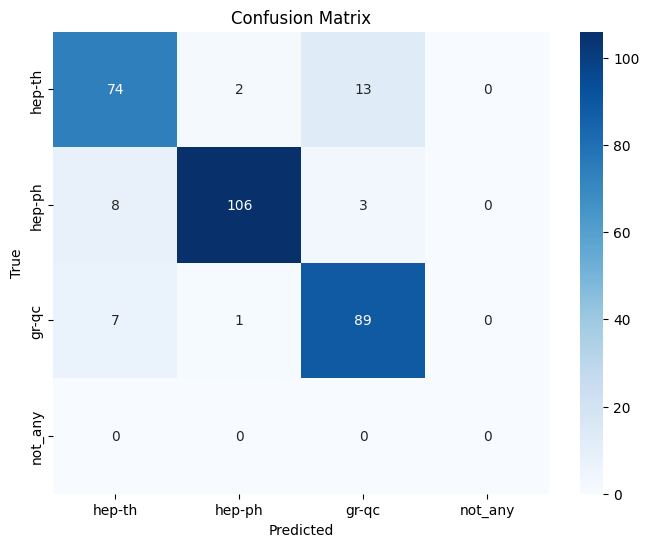

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=target_categories)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_categories, yticklabels=target_categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
def show_top_features_per_class(vectorizer, clf, categories, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        coef = clf.coef_[i]
        top_positive_idx = np.argsort(coef)[-top_n:]
        top_negative_idx = np.argsort(coef)[:top_n]

        print(f"\nCategory: {category}")
        print(f"Top {top_n} positive features:")
        print(feature_names[top_positive_idx][::-1])

        print(f"Top {top_n} negative features:")
        print(feature_names[top_negative_idx])

In [25]:
show_top_features_per_class(vectorizer, clf, target_categories, top_n=15)


Category: hep-th
Top 15 positive features:
['black' 'gravitational' 'hole' 'black hole' 'gravity' 'einstein'
 'relativity' 'metric' 'parameter' 'universe' 'spacetime'
 'general relativity' 'parameters' 'equations' 'gw']
Top 15 negative features:
['neutrino' 'decay' 'holographic' 'gauge' 'qcd' 'scattering' 'loop' 'ads'
 'amplitudes' 'heavy' 'quark' 'dimensional' 'string' 'symmetry' 'higgs']

Category: hep-ph
Top 15 positive features:
['neutrino' 'quark' 'qcd' 'bar' 'higgs' 'mass' 'pi' 'production' 'decay'
 'flavor' 'dark' 'dm' 'standard model' 'dark matter' 'meson']
Top 15 negative features:
['gravity' 'black' 'theory' 'gravitational' 'hole' 'black hole' 'field'
 'quantum' 'theories' 'spacetime' 'boundary' 'horizon' 'equations' 'time'
 'solutions']

Category: gr-qc
Top 15 positive features:
['theory' 'ads' 'holographic' 'string' 'point' 'theories' 'boundary'
 'dimensional' 'cft' 'dual' 'gauge' 'algebra' 'field theories'
 'amplitudes' 'bps']
Top 15 negative features:
['mass' 'matter' 'd

IndexError: index 3 is out of bounds for axis 0 with size 3

In [10]:
def plot_wordcloud_for_class(vectorizer, clf, category_index, category_name, max_words=100):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coef = clf.coef_[category_index]

    word_weights = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}

    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for category: {category_name}", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


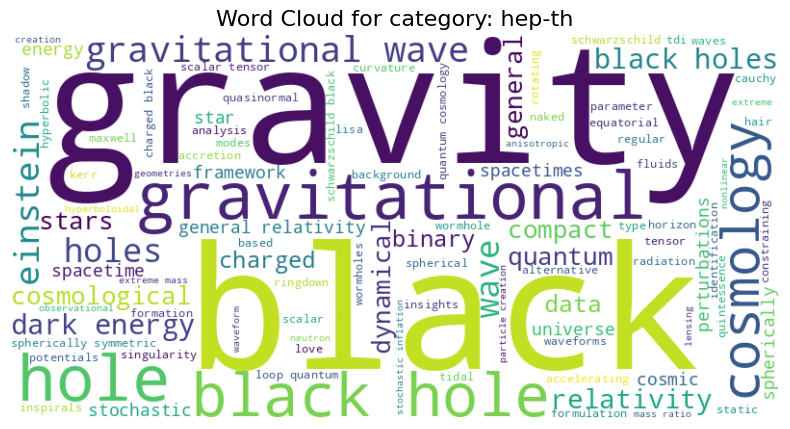

In [11]:
plot_wordcloud_for_class(vectorizer, clf, 0, target_categories[0])

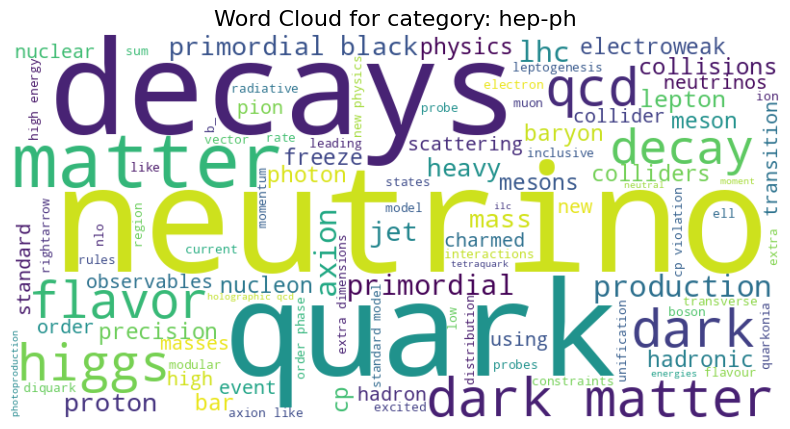

In [12]:
plot_wordcloud_for_class(vectorizer, clf, 1, target_categories[1])

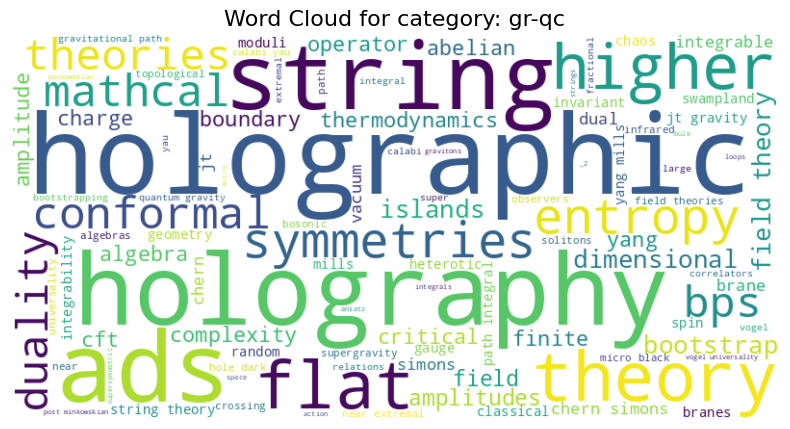

In [13]:
plot_wordcloud_for_class(vectorizer, clf, 2, target_categories[2])